In [ ]:
!pip3 install -r requirements.txt

In [38]:
import investpy
import datetime
import json
from numpy.core.numeric import True_
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [39]:
date_frmt = '%d/%m/%Y'
today = datetime.datetime.today().strftime(date_frmt)

To get stocks. Update `stocks.json` with your portfolios.

In [40]:
def getStocks(stock_file='stocks.json'):
    with open(stock_file, 'r') as json_file:
        return json.load(json_file)


Stock Code: GUBRF

     Cost: 85.3  TRY
  Current: 79.65 TRY
     Gain: -5.65 TRY
   Gain %: -6.62
     Mean: 80.62 TRY
      Max: 82.55 TRY
      Min: 79.65 TRY

             Open   High    Low  Close    Volume Currency  BIST 100
Date                                                               
2021-03-10  81.10  85.65  80.75  82.55  13190867      TRY   1564.94
2021-03-12  79.35  81.70  78.60  79.65   3088867      TRY   1557.39


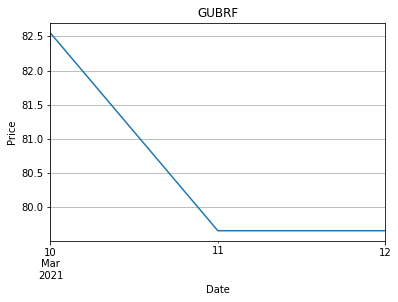

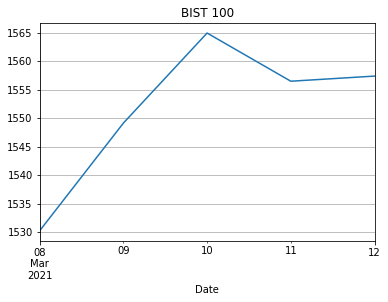


Stock Code: SISE

     Cost: 7.1   TRY
  Current: 7.66  TRY
     Gain: 0.56  TRY
   Gain %: 7.89 
     Mean: 7.61  TRY
      Max: 7.73  TRY
      Min: 7.13  TRY

            Open  High   Low  Close     Volume Currency  BIST 100
Date                                                             
2021-02-26  7.08  7.19  7.04   7.13  113245600      TRY       NaN
2021-03-12  7.72  7.73  7.61   7.66   77813600      TRY   1557.39


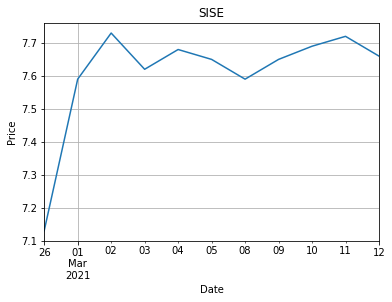

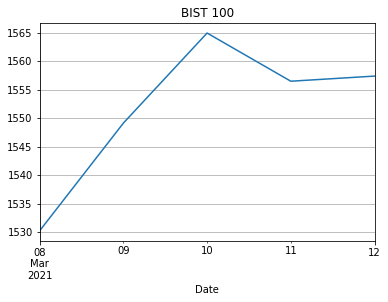

In [42]:
conf = getStocks()

for stk in conf['stocks']:
    df = investpy.get_stock_historical_data(stock=stk['code'], country=conf['country'],
                                            from_date=stk['purchase_date'], to_date=today)
    df_bist = investpy.get_index_historical_data(index=conf['index'], country=conf['country'],
                                            from_date="8/3/2021", to_date=today)
    df[index] = df_bist["Close"]
    stk_mean = df["Close"].mean()
    stk_max = df["Close"].max()
    stk_min = df["Close"].min()

    print("\nStock Code: {}\n".format(stk['code']))
    print("{:>10} {:<5} TRY".format("Cost:", stk['price']))
    print("{:>10} {:<5} TRY".format("Current:", df['Close'].iloc[-1]))
    print("{:>10} {:<5} TRY".format("Gain:", round(df['Close'].iloc[-1]-stk['price'], 2)))
    print("{:>10} {:<5}".format("Gain %:", round(100*(df['Close'].iloc[-1]/stk['price']-1), 2)))
    print("{:>10} {:<5} TRY".format("Mean:", round(stk_mean, 2)))
    print("{:>10} {:<5} TRY".format("Max:", stk_max))
    print("{:>10} {:<5} TRY\n".format("Min:", stk_min))
    print(pd.concat([df.head(1), df.tail(1)]))

    df.plot(y='Close', ylabel='Price', title=stk['code'], grid=True, legend=False)
    df_bist.plot(y='Close', title=conf['index'], grid=True, legend=False)
    plt.show()